<a href="https://colab.research.google.com/github/ankityadav2193/data-analyzing-projects/blob/main/sales_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##sales data analysis

###import some important libraries for data manipulation and computing

In [261]:
import math
import pandas as pd                # importing some libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
all_data=pd.read_csv('/content/all_data.csv')  #read data by pd.read_csv function

In [263]:
all_data.head()   # checking first five rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [264]:
all_data.shape  # checking total rows in this dataset

(186850, 6)

In [265]:
all_data.isnull().sum()  # checking null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [266]:
all_data=all_data.dropna(how='all')   # dropping all null values

In [267]:
all_data.shape    # checking shape after dropping null values

(186305, 6)

In [268]:
all_data.head()   #checcking first five rows preview

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [269]:
'04/19/19 08:46'.split('/')             # split function is basically used for splitting the data

['04', '19', '19 08:46']

In [270]:
'04/19/19 08:46'.split('/')[0]

'04'

In [271]:
def month(x):                                       # defining a function 
  return x.split('/')[0]

In [272]:
all_data['month']=all_data['Order Date'].apply(month)                 #applying a function in order date and create a new column 'month'

In [273]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [274]:
all_data.dtypes                     #checking the types of data 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [275]:
all_data['month'].unique()                    # checking all the unique values in month columns

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [276]:
filter=all_data['month']=='Order Date'                 #applying filter 
all_data=all_data[-filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [277]:
all_data['month']=all_data['month'].astype(int)                               # convert datatypes from object to integer

In [278]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [279]:
all_data['Quantity Ordered'].unique()                        # checking all the unique values in Quantity Order columns

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [280]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)                        # convert datatypes from object to integer

In [281]:
all_data['Price Each'].unique() 

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [282]:
all_data['Price Each']=all_data['Price Each'].astype(float)                  # convert datatypes from object to float

In [283]:
all_data.dtypes                                   #checkind all data types

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [284]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']                             # creating new columns of sales

In [285]:
all_data.head()                                 #checking

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [286]:
all_data.groupby('month')['sales'].sum()                    #calculating all the month sales

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

Text(0, 0.5, 'sales in USD')

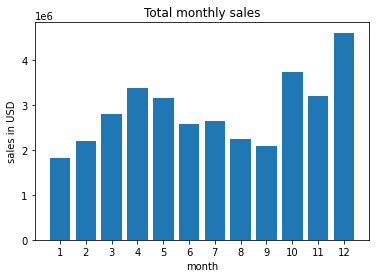

In [287]:
month=range(1,13)                                                               # visualizing all the month sales in bar graph
plt.bar(month,all_data.groupby('month')['sales'].sum())
plt.xticks(month)
plt.title('Total monthly sales')
plt.xlabel('month')
plt.ylabel('sales in USD')


In [288]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [289]:
'917 1st St, Dallas, TX 75001'.split(',')                             #split the data

['917 1st St', ' Dallas', ' TX 75001']

In [290]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [291]:
'917 1st St, Dallas, TX 75001'.split(',')[2]

' TX 75001'

In [292]:
def city(x):                                              #defining the function on city
  return x.split(',')[1]

In [293]:
all_data['city']=all_data['Purchase Address'].apply(city)              #applying and creating new column of city

In [294]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [295]:
all_data.groupby('city')['city'].count()                      #  calcualting sales according to the city

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

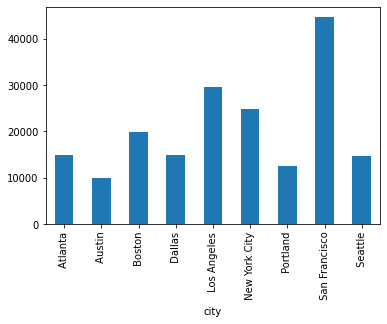

In [296]:
all_data.groupby('city')['city'].count().plot.bar()                 # visualizing the sales graph according to the city

In [297]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [298]:
all_data['Order Date'].dtypes

dtype('O')

In [299]:
all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['minute']=pd.to_datetime(all_data['Order Date']).dt.minute
all_data['day']=pd.to_datetime(all_data['Order Date']).dt.date
all_data['month']=pd.to_datetime(all_data['Order Date']).dt.month
all_data['year']=pd.to_datetime(all_data['Order Date']).dt.year

In [300]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute,day,year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46,2019-04-19,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30,2019-04-07,2019
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,2019-04-12,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,2019-04-12,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27,2019-04-30,2019


In [301]:
keys=[]                                                                         # finding total sales according to year
year=[]
for key,year_df in all_data.groupby('year'):
    keys.append(key)
    year.append(len(year_df))

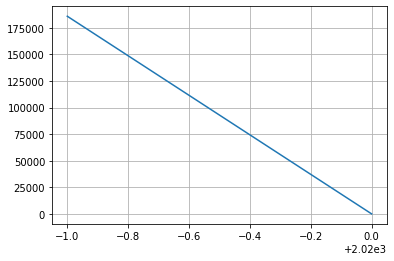

In [302]:
plt.grid()
plt.plot(keys,year)   

In [303]:
keys=[]                                                                         # finding total sales according to month
month=[]
for key,month_df in all_data.groupby('month'):
    keys.append(key)
    month.append(len(month_df))

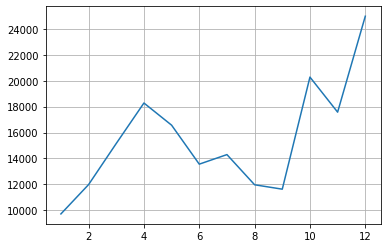

In [304]:
plt.grid()
plt.plot(keys,month)   

In [305]:
keys=[]                                                                         # finding total sales according to day
day=[]
for key,day_df in all_data.groupby('day'):
    keys.append(key)
    day.append(len(day_df))

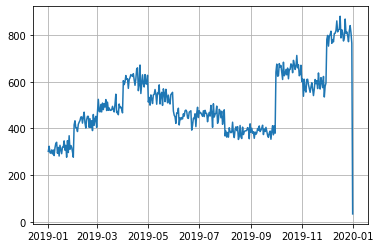

In [306]:
plt.grid()
plt.plot(keys,day)

In [307]:
keys=[]                                                                         # finding total sales according to hours
hour=[]
for key,hour_df in all_data.groupby('hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [308]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [309]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

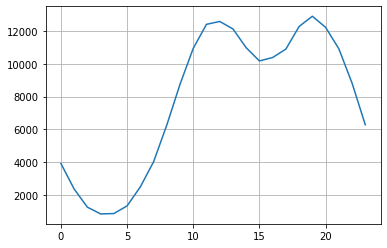

In [310]:
plt.grid()
plt.plot(keys,hour)                                                     #visulaizing sales according to hours

In [311]:
keys=[]                                                                         # finding total sales according to minutes
minute=[]
for key,minute_df in all_data.groupby('minute'):
    keys.append(key)
    minute.append(len(minute_df))

In [312]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [313]:
minute

[3065,
 3155,
 3057,
 3017,
 3098,
 3237,
 3022,
 3136,
 3050,
 3175,
 3127,
 3123,
 3107,
 3126,
 3037,
 3069,
 3175,
 3136,
 3044,
 3175,
 3048,
 3179,
 3111,
 3074,
 3108,
 3077,
 3032,
 3182,
 3071,
 3118,
 3117,
 3018,
 3089,
 3072,
 3113,
 3175,
 3131,
 3117,
 3064,
 3093,
 3042,
 3043,
 3024,
 3081,
 3133,
 3045,
 3145,
 3068,
 3199,
 3064,
 3097,
 3079,
 3169,
 3100,
 3094,
 3094,
 3073,
 3111,
 3087,
 3082]

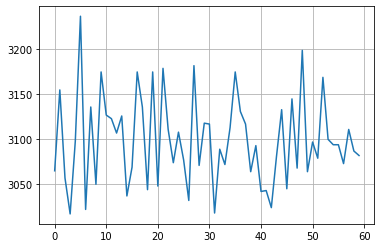

In [314]:
plt.grid()                                                                      #visulaizing sales according to minutes
plt.plot(keys,minute)     

In [315]:
all_data.groupby('Product')['Quantity Ordered'].sum()                               # finding total sales according to products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

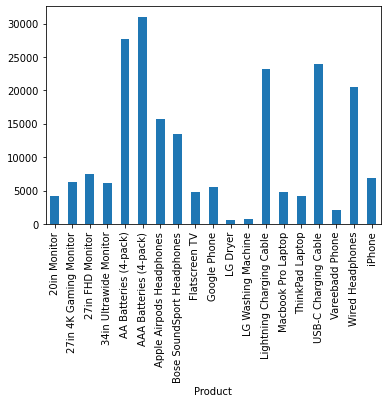

In [316]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')             # visualizing total sales according to products

In [317]:
all_data.groupby('Product')['Price Each'].mean()                           # finding total sales according to products

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [318]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()


[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

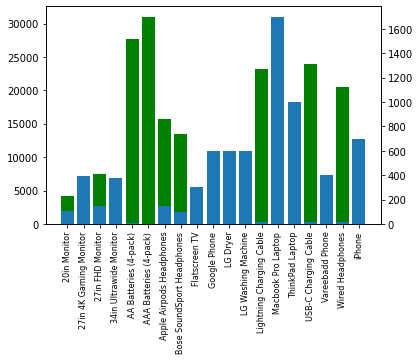

In [319]:

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.bar(products,prices)
ax1.set_xticklabels(products,rotation='vertical',size=8)